In [58]:
??nx.is_chordal

Signature: nx.is_chordal(G)
Source:   
@not_implemented_for("directed")
@not_implemented_for("multigraph")
def is_chordal(G):
    """Checks whether G is a chordal graph.

    A graph is chordal if every cycle of length at least 4 has a chord
    (an edge joining two nodes not adjacent in the cycle).

    Parameters
    ----------
    G : graph
      A NetworkX graph.

    Returns
    -------
    chordal : bool
      True if G is a chordal graph and False otherwise.

    Raises
    ------
    NetworkXNotImplemented
        The algorithm does not support DiGraph, MultiGraph and MultiDiGraph.

    Examples
    --------
    >>> e = [
    ...     (1, 2),
    ...     (1, 3),
    ...     (2, 3),
    ...     (2, 4),
    ...     (3, 4),
    ...     (3, 5),
    ...     (3, 6),
    ...     (4, 5),
    ...     (4, 6),
    ...     (5, 6),
    ... ]
    >>> G = nx.Graph(e)
    >>> nx.is_chordal(G)
    True

    Notes
    -----
    The routine tries to go through every node following maximum cardinal

In [11]:
import matplotlib.pyplot as plt
def show_graph(G):
    options = {
        'node_color': 'black',
        'node_size': 100,
        'width': 3,
    }
    nx.draw(G,**options)
    plt.show()  

In [66]:
adj_M=nx.adjacency_matrix(G)
inc_M=nx.incidence_matrix(G)

C:\Users\26581\AppData\Local\Temp\ipykernel_8428\2704615671.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_M=nx.adjacency_matrix(G)
C:\Users\26581\AppData\Local\Temp\ipykernel_8428\2704615671.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  inc_M=nx.incidence_matrix(G)


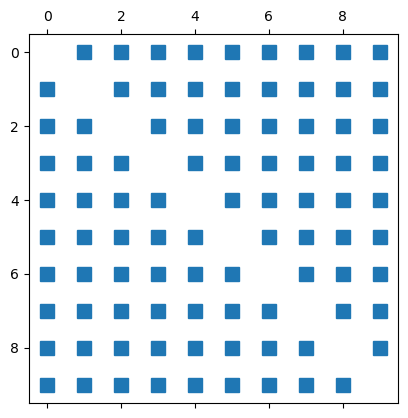

In [73]:
plt.spy(adj_M)

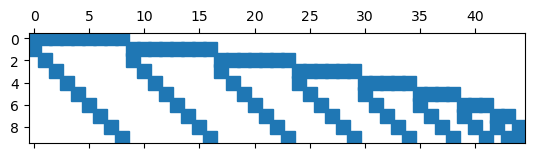

In [74]:
plt.spy(inc_M)

In [82]:
adj_M[0,1]=3
print(adj_M[0,1])

3


In [80]:
import networkx as nx
import random
from random import choice
# G=nx.complete_graph(5)
# G=nx.path_graph(5)
def least_index(main_set,sub_set):
    for n in main_set:
        if n in sub_set:
            return n
def LexBFS(G):
    #fixed S.E.O
    R=[]
    #label queue
    S=[[]]
    #init state 0
    S[0]=list(G.nodes())
    while True:
        #pick vertex v from right most
        v=choice(S[-1])
        S[-1].remove(v)
        R.append(v)
        #pick all neighbors
        w=list(G.neighbors(v))
        length=len(S)
        for i in range(length-1,-1,-1):
            #update label
            inter=set(S[i]).intersection(set(w))
            if list(inter):
                #if intersect, delete old vertex and insert new set
                S[i]=list(set(S[i]).difference(inter))
                S.insert(i+1,list(inter))
        #delete empty set
        S=[s for s in S if s!=[]]
        # print(S)
        if not S:
            break
    #return reverse
    return R[::-1]

seq=LexBFS(G)
seq


[0, 2, 3, 8, 7, 4, 6, 1, 5]

In [ ]:
# for i in range(5-1,-1,-1):
#     print(i)
list(G.edges)

In [81]:
def is_chordal_graph(G,seq):
    n=len(seq)
    A=dict.fromkeys(seq,[])
    for i in range(0,n-1):
        v=seq[i]
        w=list(G.neighbors(v))
        X=list(set(seq[i+1:]).intersection(set(w)))
        if X:
            u=least_index(seq,X)
            #concatenate X — {u} to A[u]
            X.remove(u)
            A[u]=list(set(A[u]+X))
        inter=list(set(A[v]).intersection(set(w)))
        if A[v]!=inter:
            print(v,A[v],w,inter)
            return False
    return True
# seq=[i for i in range(9)]
is_chordal_graph(G,seq)         

True

In [11]:
A=[1,2]
B=[1,2,3,4,5]
A==list(set(A).intersection(set(B)))

True

In [52]:

A=G

In [4]:
# 
def cliques(G,seq):
    chromatic=1
    S=dict.fromkeys(seq,0)
    n=len(seq)
    for i in range(0,n):
        v=seq[i]
        # forward neighbor
        w=list(G.neighbors(v))
        X=list(set(seq[i+1:]).intersection(set(w)))
        n_x=len(X)
        if not w:
            print(w)
        if not X:
            break
        #get smallest vertex in intersect
        u=least_index(seq[i+1:],X)
        S[u]=max(S[u],n_x-1)
        if S[v]<n_x:
            print([v]+X)
            #max k and |X|+1
            chromatic=max(chromatic,n_x+1)
    print(chromatic)
        
cliques(G,seq)


In [69]:
def generate_chordal(n):
    '''
    generate chordal graph with n vertices 
    by construct simplicial elimination order randomly 
    '''
    record_G=[]
    record_H=[]
    G=nx.Graph()
    seq=[i for i in range(n)]
    G.add_nodes_from(seq)
    for i in seq:
        #number of forward vertex
        f_n=n-i-1
        #connect k forward vertex
        k=random.randint(0,f_n)
        #list of forward vertex
        f_w=random.sample(seq[i+1:],k)
        #neighbor vertex
        w=list(G.neighbors(i))
        #existing forward vertex
        exist_f=[j for j in w if j >i]
        #current vertex + existing forward vertex + random picked vertex
        f_w_c=[i]+f_w+exist_f
        f_w_c=list(set(f_w_c))
        #add edges
        H=nx.complete_graph(f_w_c)
        G.add_edges_from(H.edges)
    return G
for i in range(1):
    G=generate_chordal(9)
    if not nx.is_chordal(G):
        print(nx.is_chordal(G))
        # P=G
        # break


In [58]:
nx.is_chordal(A)

True

In [84]:

print(list(P.nodes))
print(list(P.edges))

[0, 1, 2, 3, 4, 5, 6]
[(0, 1), (0, 3), (1, 3), (1, 4), (1, 2), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


In [86]:
G=nx.Graph()
seq=[i for i in range(7)]
G.add_nodes_from(seq)

In [4]:
f_w=[3,4,2,5,7,2,2]
# A=[i for i in f_w if i >3]
# A
# f_w_c=f_w+[1]
H=nx.complete_graph(f_w)
list(H.nodes)
# G.add_edges_from(H.edges)


[3, 4, 2, 5, 7]

In [91]:
print(list(G.edges))

[(0, 1), (0, 3), (1, 3), (1, 4), (1, 2), (2, 3), (2, 4), (3, 4)]


In [71]:
G=nx.Graph()
G.add_nodes_from([i for i in range(8)])
G.add_edges_from(H.edges)


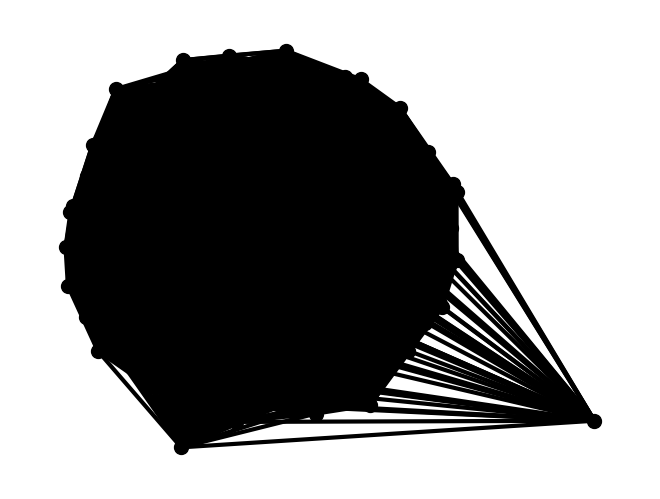

In [21]:
show_graph(G)